# Biodoversity in National Parks: Portfolio Project

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import csv files
observations_df = pd.read_csv(r"C:\unzipped\biodiversity-starter\biodiversity_starter\observations.csv")
species_df = pd.read_csv(r"C:\unzipped\biodiversity-starter\biodiversity_starter\species_info.csv")



## First Look

In [4]:
#first 5 rows of each df
display(observations_df.head())
display(species_df.head())



,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
#print column headings
print(observations_df.columns)
print(species_df.columns)



Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [6]:
#print df datatypes
print(observations_df.dtypes)
print(species_df.dtypes)


scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [7]:
#row counts for df
observations_df.count()
species_df.count()

#conservation status might have less values because the majority of the animals arent in need of conservation

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [8]:
#view the unique values in conservation_status
print(species_df.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [12]:
#number of unique species
print("There are " + str(species_df.scientific_name.nunique()) + " species observed in the data.")

There are 5541 species observed in the data.


## Cleanup

In [17]:
#check for duplicates
duplicates = observations_df.duplicated()
print(duplicates.value_counts())

duplicates_species = species_df.duplicated()
print(duplicates_species.value_counts())

#drop duplicates
observations_df = observations_df.drop_duplicates()


False    23281
True        15
Name: count, dtype: int64
False    5824
Name: count, dtype: int64


In [27]:
#change NA value
species_df.fillna('No Intervention', inplace=True)

## Exploratory Data Analysis

### What is the distribution of conservation_status for animals?

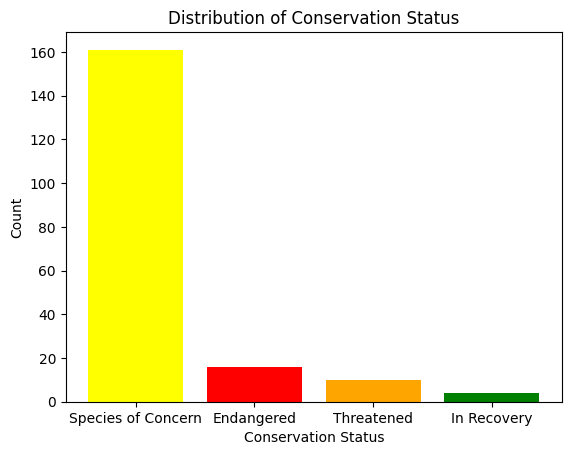

<Figure size 640x480 with 0 Axes>

In [28]:


#x axis values
con_status = ["Species of Concern", "Endangered", "Threatened", "In Recovery"]
#y axis values
con_status_count = [(species_df.conservation_status.value_counts()["Species of Concern"]), (species_df.conservation_status.value_counts()["Endangered"]), (species_df.conservation_status.value_counts()["Threatened"]), (species_df.conservation_status.value_counts()["In Recovery"])]
#plot bar graph
color = ["yellow", "red", "orange", "green"]
plt.bar(con_status, con_status_count, color=color)
plt.title("Distribution of Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Count")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\dist_of_cons_status.png")
plt.show()
plt.clf()

As shown above, "Species of Concern" is the largest category, followed by "Endangered", "Threatened", and "In Recovery".

### Are certain types of species more likely to be endangered?

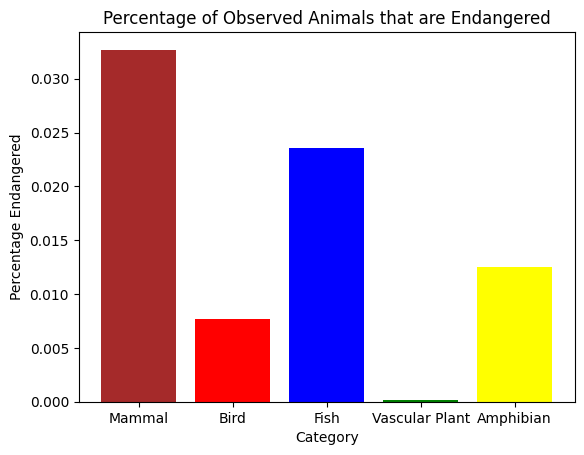

<Figure size 640x480 with 0 Axes>

In [29]:

#filter by endangered species
end_cat = species_df[species_df["conservation_status"] == "Endangered"]
#categories of endangered animals
categories = end_cat.category.unique()
#total counts of animals in each category
category_counts = species_df.category.value_counts()[categories].tolist()
#counts of endangered animals in each category
end_cat_counts = end_cat.category.value_counts()[categories].tolist()
#calculating percentage of category that is endangered
end_perc = [round(end_cat_counts[0] / category_counts[0], 4), round(end_cat_counts[1] / category_counts[1], 4), round(end_cat_counts[2] / category_counts[2], 4), round(end_cat_counts[3] / category_counts[3], 4), round(end_cat_counts[4] / category_counts[4], 4)]

#plotting bar graph
color = ["brown", "red", "blue", "green", "yellow"]
plt.bar(categories, end_perc, color=color)
plt.title("Percentage of Observed Animals that are Endangered")
plt.xlabel("Category")
plt.ylabel("Percentage Endangered")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\perc_obs_end.png")
plt.show()
plt.clf()

"Mammals" is the category with the largest percentage of endangered species with over 3% of species carrying the designation.

#### Conservation Status of All Animal Categories

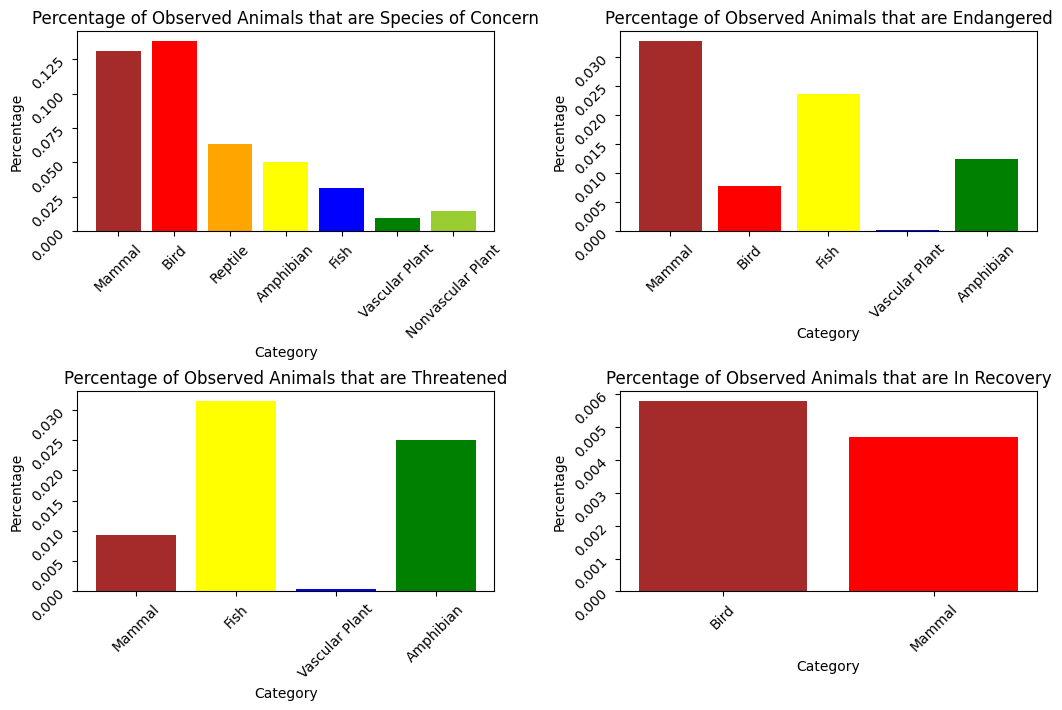

<Figure size 640x480 with 0 Axes>

In [30]:
#filter by species of concern
soc_cat = species_df[species_df["conservation_status"] == "Species of Concern"]
#categories of "species of concern" animals
soc_categories = soc_cat.category.unique()
#total counts of animals in each category
soc_category_counts = species_df.category.value_counts()[soc_categories].tolist()
#counts of "species of concern" animals in each category
soc_cat_counts = soc_cat.category.value_counts()[soc_categories].tolist()
#calculating percentage of category that is "species of concern"
soc_perc = [round(soc_cat_counts[0] / soc_category_counts[0], 4), round(soc_cat_counts[1] / soc_category_counts[1], 4), round(soc_cat_counts[2] / soc_category_counts[2], 4), round(soc_cat_counts[3] / soc_category_counts[3], 4), round(soc_cat_counts[4] / soc_category_counts[4], 4), round(soc_cat_counts[5] / soc_category_counts[5], 4), round(soc_cat_counts[6] / soc_category_counts[6], 4)]

#filter by endangered species
end_cat = species_df[species_df["conservation_status"] == "Endangered"]
#categories of endangered animals
end_categories = end_cat.category.unique()
#total counts of animals in each category
end_category_counts = species_df.category.value_counts()[end_categories].tolist()
#counts of endangered animals in each category
end_cat_counts = end_cat.category.value_counts()[end_categories].tolist()
#calculating percentage of category that is endangered
end_perc = [round(end_cat_counts[0] / end_category_counts[0], 4), round(end_cat_counts[1] / end_category_counts[1], 4), round(end_cat_counts[2] / end_category_counts[2], 4), round(end_cat_counts[3] / end_category_counts[3], 4), round(end_cat_counts[4] / end_category_counts[4], 4)]

#filter by threatened species
thr_cat = species_df[species_df["conservation_status"] == "Threatened"]
#categories of threatened animals
thr_categories = thr_cat.category.unique()
#total counts of animals in each category
thr_category_counts = species_df.category.value_counts()[thr_categories].tolist()
#counts of threatened animals in each category
thr_cat_counts = thr_cat.category.value_counts()[thr_categories].tolist()
#calculating percentage of category that is threatened
thr_perc = [round(thr_cat_counts[0] / thr_category_counts[0], 4), round(thr_cat_counts[1] / thr_category_counts[1], 4), round(thr_cat_counts[2] / thr_category_counts[2], 4), round(thr_cat_counts[3] / thr_category_counts[3], 4)]

#filter by in recovery species
ir_cat = species_df[species_df["conservation_status"] == "In Recovery"]
#categories of "in recovery" animals
ir_categories = ir_cat.category.unique()
#total counts of animals in each category
ir_category_counts = species_df.category.value_counts()[ir_categories].tolist()
#counts of "in recovery" animals in each category
ir_cat_counts = ir_cat.category.value_counts()[ir_categories].tolist()
#calculating percentage of category that is "in recovery"
ir_perc = [round(ir_cat_counts[0] / ir_category_counts[0], 4), round(ir_cat_counts[1] / ir_category_counts[1], 4)]

#create subplots
figure, axe = plt.subplots(2, 2, figsize=(24,8))
#adjust margins
plt.subplots_adjust(left=0.3, right=0.7, bottom=0.2, top=0.9, wspace=0.3, hspace=0.8)

#plot subplots
color = ["brown", "red", "orange", "yellow", "blue", "green", "yellowgreen"]
axe[0, 0].bar(soc_categories, soc_perc, color=color)
axe[0, 0].tick_params(labelrotation=45)
axe[0, 0].set_title("Percentage of Observed Animals that are Species of Concern")
axe[0, 0].set_xlabel("Category")
axe[0, 0].set_ylabel("Percentage")

color2 = ["brown", "red", "yellow", "blue", "green"]
axe[0, 1].bar(end_categories, end_perc, color=color2)
axe[0, 1].tick_params(labelrotation=45)
axe[0, 1].set_title("Percentage of Observed Animals that are Endangered")
axe[0, 1].set_xlabel("Category")
axe[0, 1].set_ylabel("Percentage")

color3 = ["brown", "yellow", "blue", "green"]
axe[1, 0].bar(thr_categories, thr_perc, color=color3)
axe[1, 0].tick_params(labelrotation=45)
axe[1, 0].set_title("Percentage of Observed Animals that are Threatened")
axe[1, 0].set_xlabel("Category")
axe[1, 0].set_ylabel("Percentage")

color4 = ["brown", "red"]
axe[1, 1].bar(ir_categories, ir_perc, color=color4)
axe[1, 1].tick_params(labelrotation=45)
axe[1, 1].set_title("Percentage of Observed Animals that are In Recovery")
axe[1, 1].set_xlabel("Category")
axe[1, 1].set_ylabel("Percentage")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\perc_of_con_status_cat.png")
plt.show()
plt.clf()

### Are the differences between species and their conservation status significant?

In [42]:
#protected vs not protected table
species_df["protected"] = species_df.conservation_status != "No Intervention"

category_counts = species_df.groupby(["category", "protected"]).scientific_name.nunique().reset_index().pivot(columns="protected", index="category", values="scientific_name")
category_counts.columns = ["not_protected", "protected"]

display(category_counts)

,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


#### Chi-2 Calculations Between Animals and Non-Vascular Plants

In [52]:
from scipy.stats import chi2_contingency
nonv_plant_amphibian = [[5, 328], [7, 72]]
chi2_contingency(nonv_plant_amphibian)

Chi2ContingencyResult(statistic=9.765103711306242, pvalue=0.001778554820715609, dof=1, expected_freq=array([[  9.69902913, 323.30097087],
       [  2.30097087,  76.69902913]]))

With the level of statistical significance being 0.05, the p-value of 0.002 means that amphibians and non-vascular plants have a significant relationship.

In [56]:
nonv_plant_bird = [[5, 328], [75, 413]]
chi2_contingency(nonv_plant_bird)

Chi2ContingencyResult(statistic=41.71745786999272, pvalue=1.0546306904974968e-10, dof=1, expected_freq=array([[ 32.44823386, 300.55176614],
       [ 47.55176614, 440.44823386]]))

With the level of statistical significance being 0.05, the p-value of 1.05 means that non-vascular plants and birds do not have a significant relationship.

In [57]:
nonv_plant_fish = [[5, 328], [11, 115]]
chi2_contingency(nonv_plant_fish)

Chi2ContingencyResult(statistic=12.13040550073211, pvalue=0.0004960633228752838, dof=1, expected_freq=array([[ 11.60784314, 321.39215686],
       [  4.39215686, 121.60784314]]))

With the level of statistical significance being 0.05, the p-value of 0.0005 means that non-vascular plants and fish do have a significant relationship.

In [59]:
nonv_plant_mammal = [[5, 328], [30, 146]]
chi2_contingency(nonv_plant_mammal)

Chi2ContingencyResult(statistic=41.0526001992972, pvalue=1.481868915759314e-10, dof=1, expected_freq=array([[ 22.8978389, 310.1021611],
       [ 12.1021611, 163.8978389]]))

With the level of statistical significance being 0.05, the p-value of 1.48 means that non-vascular plants and mammals do not have a significant relationship.

In [60]:
nonv_plant_reptile = [[5, 328], [5, 73]]
chi2_contingency(nonv_plant_reptile)

Chi2ContingencyResult(statistic=4.513570089848144, pvalue=0.03362698310726171, dof=1, expected_freq=array([[  8.10218978, 324.89781022],
       [  1.89781022,  76.10218978]]))

With the level of statistical significance being 0.05, the p-value of 0.03 means that non-vascular plants and reptiles do have a significant relationship.

#### Conclusion

Reptiles, amphibians, and fish all have statistically significant relationships with non-vascular plants. This could mean that these animals rely on non-vascular plants as a food source or shelter, and/or non-vascular plants rely on these animals for their propagation.

#### Chi-2 Calculations Between Animals and Vascular Plants

In [61]:
vasc_plant_reptile = [[46, 4216], [5, 73]]
chi2_contingency(vasc_plant_reptile)

Chi2ContingencyResult(statistic=14.435371140033908, pvalue=0.00014505215494675828, dof=1, expected_freq=array([[5.00834101e+01, 4.21191659e+03],
       [9.16589862e-01, 7.70834101e+01]]))

With the level of statistical significance being 0.05, the p-value of 0.0001 means that vascular plants and reptiles do have a significant relationship.

In [62]:
vasc_plant_mammal = [[46, 4216], [30, 146]]
chi2_contingency(vasc_plant_mammal)

Chi2ContingencyResult(statistic=246.5870424874456, pvalue=1.4405067309854046e-55, dof=1, expected_freq=array([[7.29860297e+01, 4.18901397e+03],
       [3.01397026e+00, 1.72986030e+02]]))

With the level of statistical significance being 0.05, the p-value of 1.44 means that vascular plants and mammals do not have a significant relationship.

In [63]:
vasc_plant_fish = [[46, 4216], [11, 115]]
chi2_contingency(vasc_plant_fish)

Chi2ContingencyResult(statistic=50.06568276285048, pvalue=1.4868469491889182e-12, dof=1, expected_freq=array([[5.53632634e+01, 4.20663674e+03],
       [1.63673655e+00, 1.24363263e+02]]))

With the level of statistical significance being 0.05, the p-value of 1.48 means that vascular plants and fish do not have a significant relationship.

In [65]:
vasc_plant_bird = [[46, 4216], [75, 413]]
chi2_contingency(vasc_plant_bird)

Chi2ContingencyResult(statistic=354.42332680820607, pvalue=4.612268031690142e-79, dof=1, expected_freq=array([[ 108.56884211, 4153.43115789],
       [  12.43115789,  475.56884211]]))

With the level of statistical significance being 0.05, the p-value of 4.61 means that vascular plants and birds do not have a significant relationship.

In [66]:
vasc_plant_amph = [[46, 4216], [7, 72]]
chi2_contingency(vasc_plant_amph)

Chi2ContingencyResult(statistic=32.75729797707421, pvalue=1.044135514665698e-08, dof=1, expected_freq=array([[5.20354757e+01, 4.20996452e+03],
       [9.64524303e-01, 7.80354757e+01]]))

With the level of statistical significance being 0.05, the p-value of 1.04 means that vascular plants and amphibians do not have a significant relationship.

#### Conclusion

The only category that has a statistically significant relationship with vascular plants are reptiles. This shows that reptiles are the only animal that has a relationship with both vascular and non-vascular plants.

### Which species were spotted the most at each park?

In [31]:

#merge dataframes
biodiversity = pd.merge(species_df, observations_df)

#find unique park names
parks = biodiversity.park_name.unique()

#organize by park name
park0_obs = biodiversity[biodiversity["park_name"] == parks[0]]
park1_obs = biodiversity[biodiversity["park_name"] == parks[1]]
park2_obs = biodiversity[biodiversity["park_name"] == parks[2]]
park3_obs = biodiversity[biodiversity["park_name"] == parks[3]]

#filter by max observations
parks_max_obs = [park0_obs.observations.max(), park1_obs.observations.max(), park2_obs.observations.max(), park3_obs.observations.max()]


#find species name that matches max observations
park0_name = biodiversity[biodiversity["observations"] == parks_max_obs[0]]
park1_name = biodiversity[biodiversity["observations"] == parks_max_obs[1]]
park2_name = biodiversity[biodiversity["observations"] == parks_max_obs[2]]
park3_name = biodiversity[biodiversity["observations"] == parks_max_obs[3]]

#list of species with max observations for each park
parks_max_name = [park0_name.common_names, park1_name.common_names, park2_name.common_names, park3_name.common_names]

#concatenated dataframe of max observations in each park
max_obs = pd.concat([park0_name, park1_name, park2_name, park3_name])

display(max_obs)



,category,scientific_name,common_names,conservation_status,park_name,observations
23,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,Yosemite National Park,176
31,Mammal,Cervus elaphus,Rocky Mountain Elk,No Intervention,Yosemite National Park,176
1652,Bird,Vermivora chrysoptera X pinus,Brewster's Warbler,No Intervention,Yosemite National Park,176
2613,Fish,Luxilus coccogenis,Warpaint Shiner,No Intervention,Yosemite National Park,176
2914,Fish,Cottus carolinae,Banded Sculpin,No Intervention,Yosemite National Park,176
...,...,...,...,...,...,...
22684,Vascular Plant,Philadelphus lewisii,Lewis' Mock Orange,No Intervention,Yellowstone National Park,223
24467,Vascular Plant,Juncus capillaris,Hairystem Dwarf Rush,No Intervention,Yellowstone National Park,223
24621,Vascular Plant,Bromus grandis,Tall Brome,No Intervention,Yellowstone National Park,223
24633,Vascular Plant,Bromus laevipes,"Chinook Brome, Woodland Brome",No Intervention,Yellowstone National Park,223


Each park had multiple max observations so making a figure to visualize this was virtually impossible. This is why the results are displayed in a dataframe.